<a href="https://colab.research.google.com/github/natalied0000/Stock-Value-Prediction-with-LSTM/blob/last/machine_learning_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Basic Stats**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import time
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from scipy.stats import linregress
from sklearn.metrics import max_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import TimeSeriesSplit

In [3]:
df_lstm = pd.read_csv('/content/TWTR (1).csv', index_col='Date')
df_lstm.Date=[dt.datetime.strptime(d, '%Y-%m-%d').date() for d in df_lstm.index.values]

df_lstm.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,28.260000,28.990000,27.870001,28.809999,28.809999,15053700
2019-01-03,28.379999,29.180000,27.940001,27.990000,27.990000,19051700
2019-01-04,28.389999,30.100000,28.309999,29.950001,29.950001,23412600
2019-01-07,30.200001,31.379999,29.770000,31.340000,31.340000,19917800
2019-01-08,31.700001,32.049999,30.910000,31.799999,31.799999,18915200


In [4]:
df_lstm.shape

(863, 6)

In [5]:
df_lstm.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-27,39.570000,40.770000,39.480000,40.169998,40.169998,16789900
2022-05-31,40.070000,40.349998,39.419998,39.599998,39.599998,11579000
2022-06-01,39.799999,40.259998,39.240002,39.299999,39.299999,11117200
2022-06-02,39.070000,40.470001,38.810001,39.910000,39.910000,11696000
2022-06-03,40.450001,41.040001,39.980000,40.160000,40.160000,18244400


In [6]:
df_lstm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,863.000000,863.000000,863.000000,863.000000,863.000000,8.630000e+02
mean,43.745226,44.538007,42.935736,43.718459,43.718459,2.000770e+07
std,12.717354,12.917236,12.463546,12.665124,12.665124,2.167192e+07
min,22.110001,23.490000,20.000000,22.000000,22.000000,3.661100e+06
25%,33.815000,34.524999,33.295000,33.990000,33.990000,1.102260e+07
50%,39.790001,40.439999,39.250000,39.779999,39.779999,1.524290e+07
75%,51.995001,52.855000,50.575001,51.895000,51.895000,2.115005e+07
max,78.360001,80.750000,76.050003,77.629997,77.629997,2.684654e+08


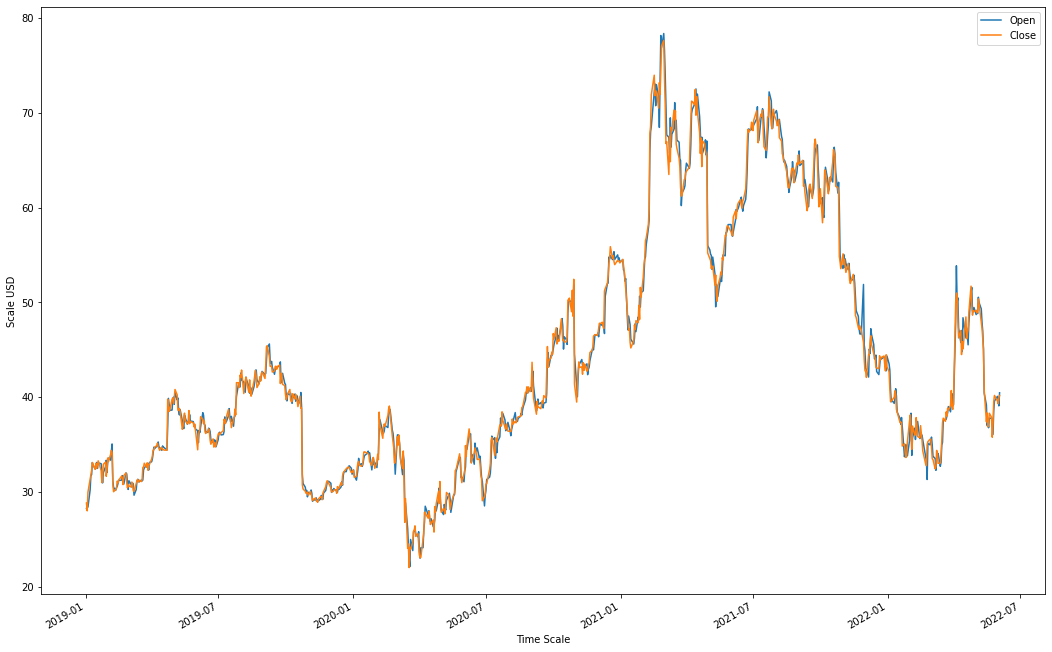

In [7]:
plt.rcParams['figure.figsize']=(18,12)
x=[dt.datetime.strptime(d, '%Y-%m-%d').date() for d in df_lstm.index.values]
plt.plot(x, df_lstm['Open'], label='Open')
plt.plot(x,df_lstm['Close'], label='Close')

plt.xlabel('Time Scale')
plt.ylabel('Scale USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

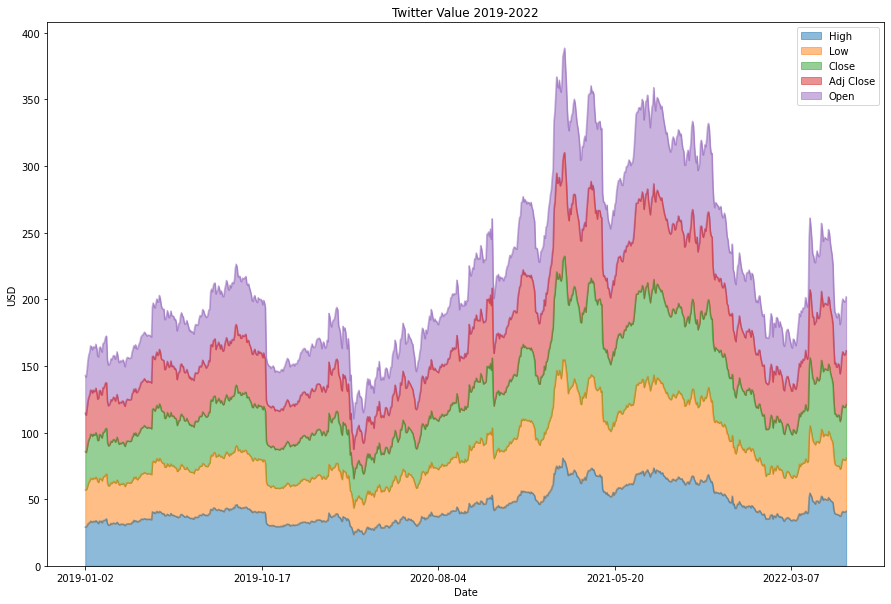

In [8]:
df_lstm[["High","Low","Close","Adj Close","Open"]].plot.area(figsize=(15,10),alpha=0.5);
plt.title('Twitter Value 2019-2022')
plt.ylabel("USD")
plt.xlabel('Date')
plt.show()

In [9]:
df_lstm.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

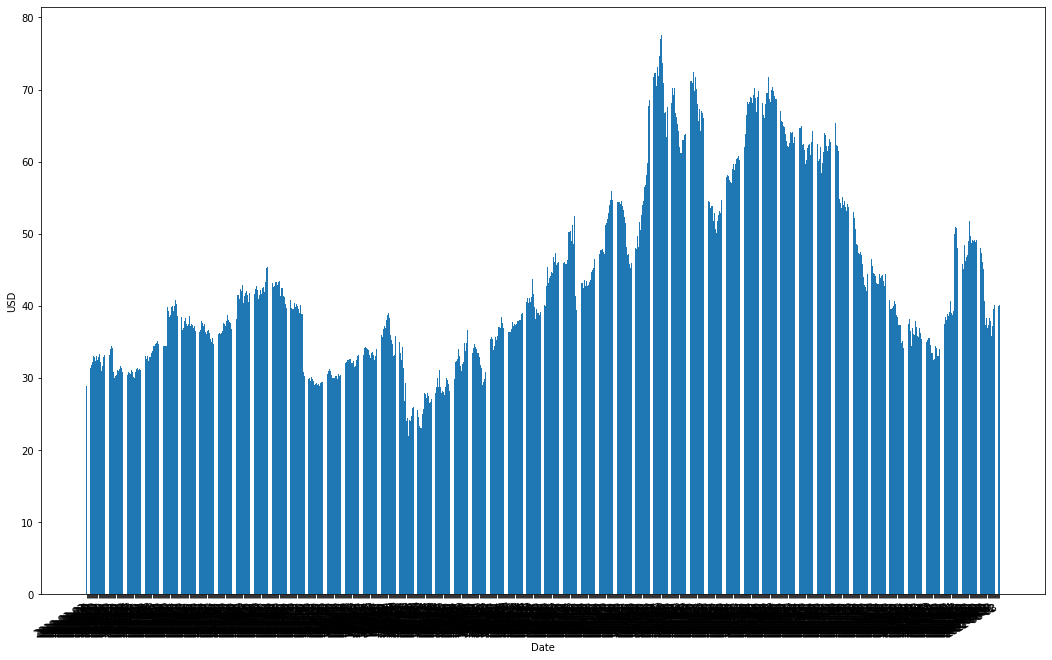

In [10]:
plt.bar(x=df_lstm.index, height=df_lstm.Close)
plt.gcf().autofmt_xdate()
plt.ylabel("USD")
plt.xlabel('Date')
plt.show()



# Prophet



In [11]:
data = df_lstm.filter(['Close'])
data_train=data.reset_index()
data_train = data_train[:691]

data = pd.DataFrame(pd.np.empty((0, 2)))  
data_train.columns=['ds','y']
data_train.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """


(691, 2)

In [12]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

prophet=Prophet()
prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet.fit(data_train[['ds','y']]);

future=prophet.make_future_dataframe(periods=172)
predict=prophet.predict(future)

Text(0.5, 46.5, 'Date')

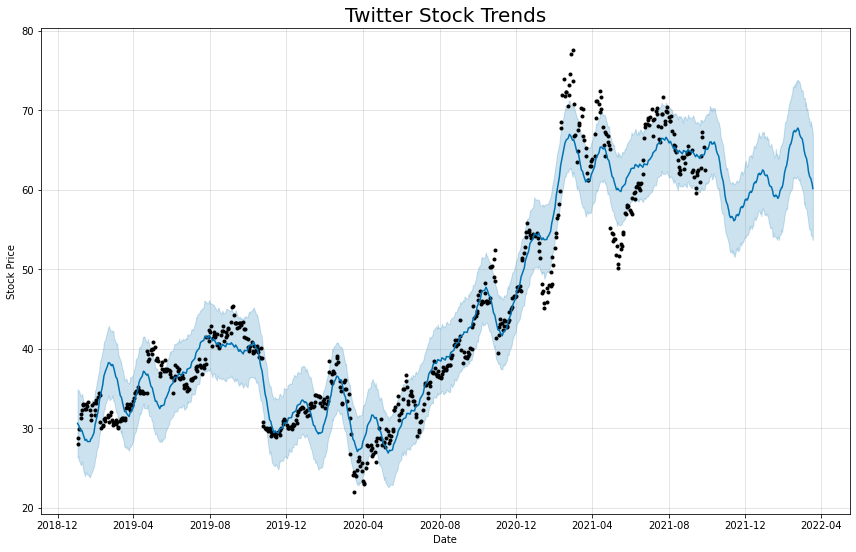

In [13]:
fig1=prophet.plot(predict,figsize=(12,7.5))
plt.title('Twitter Stock Trends',fontsize=20)
plt.ylabel('Stock Price')
plt.xlabel('Date')

Text(0.5, 46.5, 'Year')

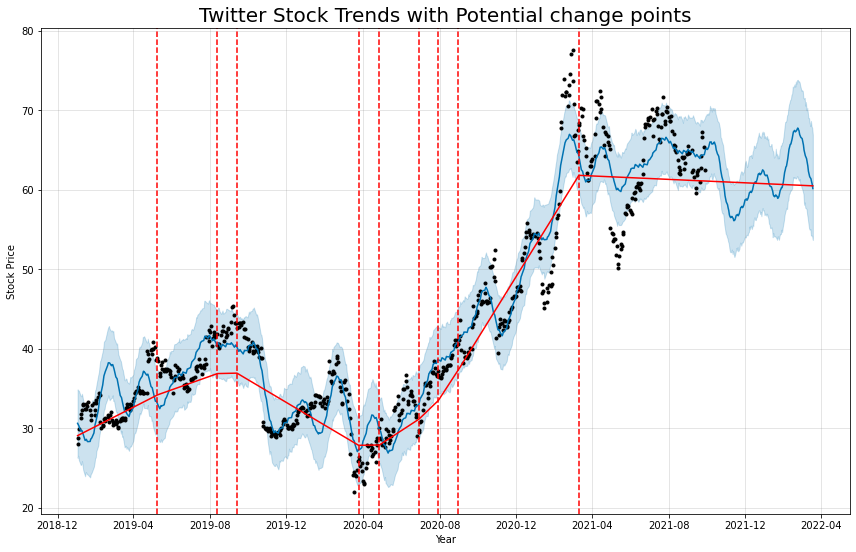

In [14]:
fig = prophet.plot(predict,figsize=(12,7.5))
a = add_changepoints_to_plot(fig.gca(), prophet, predict)
plt.title('Twitter Stock Trends with Potential change points',fontsize=20)
plt.ylabel('Stock Price')
plt.xlabel('Year')

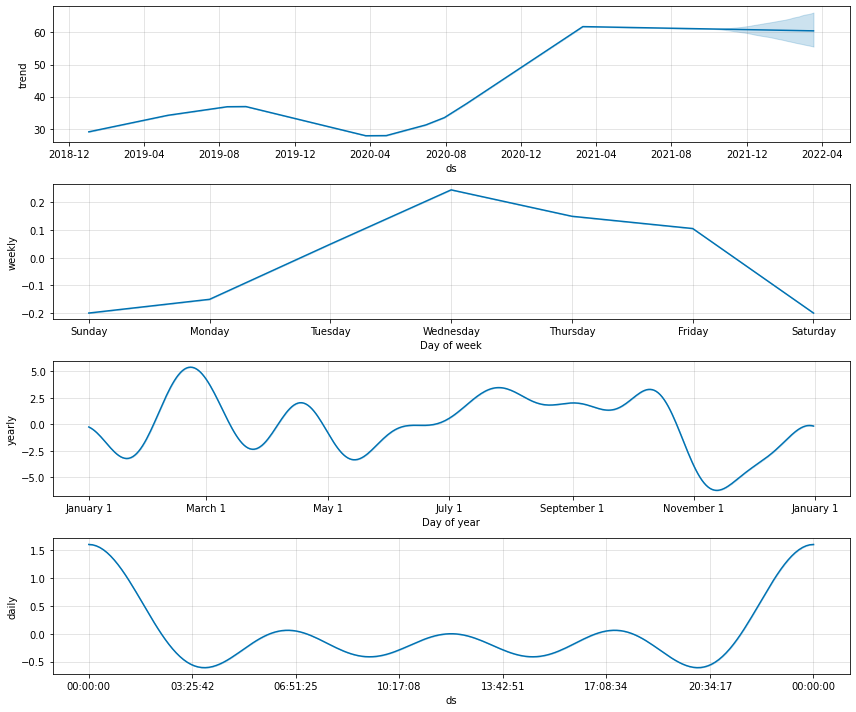

In [15]:
fig2=prophet.plot_components(predict,figsize=(12,10))

# Linear Regression


In [16]:
df_linreg = pd.read_csv('/content/TWTR (1).csv')

reg = LinearRegression(copy_X=True, fit_intercept=True)
df_linreg['Time'] = np.arange(len(df_linreg.index))
X = df_linreg.loc[:, ['Time']]  # features
y = df_linreg.loc[:, 'Close']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

reg.fit(X_train, y_train)
X_train.shape

(690, 1)

In [17]:
y_pred = reg.predict(X_test)

print("Mean square error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score %.2f' % r2_score(y_test, y_pred))

Mean square error: 111.04
Variance score 0.29


In [18]:
linregress(y_test,y_pred)

LinregressResult(slope=0.3026908306124756, intercept=30.72965754027246, rvalue=0.5356228473322515, pvalue=3.1239404215135377e-14, stderr=0.03649386160463062)

In [19]:
reg_res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Date value': X_test.values.flatten(), 'Diference': y_test-y_pred})
reg_res.sort_values(by=['Date value'], inplace=True)
reg_res

,Actual,Predicted,Date value,Diference
3,31.340000,31.898129,3,-0.558129
8,32.369999,32.036357,8,0.333642
16,32.900002,32.257522,16,0.642480
17,33.130001,32.285167,17,0.844834
19,32.259998,32.340458,19,-0.080460
...,...,...,...,...
841,49.060001,55.065105,841,-6.005104
843,49.799999,55.120396,843,-5.320397
849,37.389999,55.286269,849,-17.896270
854,37.860001,55.424497,854,-17.564496


In [20]:
max_error(y_test, y_pred)

30.80326774007021

In [21]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
MSE = np.square(np.subtract(y_test,y_pred)).mean()
print(MSE)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test,y_pred)
print(r2)

Mean Absolute Error: 8.287905132426618
111.03962448187168
Mean Squared Error: 111.03962448187171
Root Mean Squared Error: 10.537534079749005
0.28599887172760363


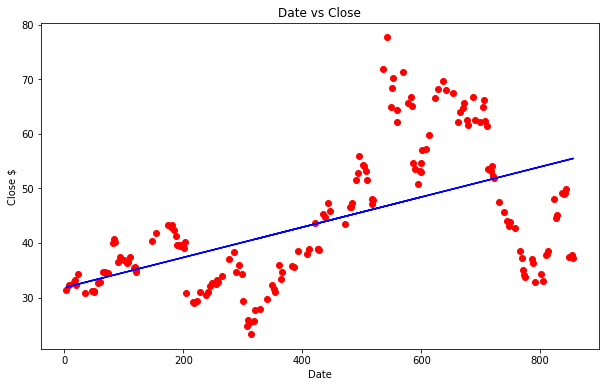

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Date vs Close')
plt.xlabel('Date')
plt.ylabel('Close $')
plt.show()

Text(0, 0.5, 'Amount of errors in sample')

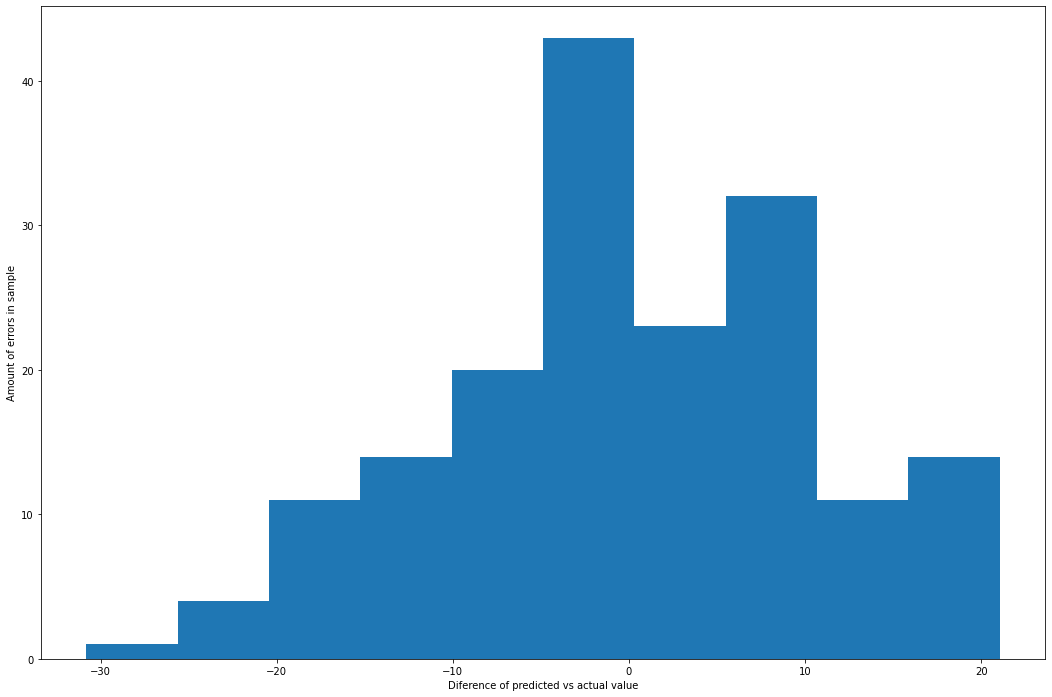

In [23]:
residuals = y_pred - y_test
plt.hist(residuals)
plt.xlabel("Diference of predicted vs actual value")
plt.ylabel("Amount of errors in sample")

# **LSTM**

In [37]:
df_lstm['Time'] = np.arange(len(df_lstm.index))
X2 = df_lstm.loc[:, ['Time']]  # features
y2 = df_lstm.loc[:, 'Close']  # target
data = df_lstm.filter(['Close'])
dataset = data.values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.2, random_state=1)

sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(dataset)
scaled_data.shape

(863, 1)

In [42]:
training_set = df_lstm.iloc[:863, 3:4].values
test_set = df_lstm.iloc[863:, 3:4].values

In [45]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train3 = []
y_train3 = []
for i in range(173, 863):
    X_train3.append(training_set_scaled[i-173:i, 0])
    y_train3.append(training_set_scaled[i, 0])
X_train3, y_train3 = np.array(X_train3), np.array(y_train3)
X_train3 = np.reshape(X_train3, (X_train3.shape[0], X_train3.shape[1], 1))
X_train3.shape

(690, 173, 1)

In [48]:
from keras import callbacks

lstm = Sequential()
lstm.add(LSTM(64, return_sequences=True, input_shape= (X_train3.shape[1], 1)))
lstm.add(LSTM(32, return_sequences=False))
lstm.add(Dense(25))
lstm.add(Dense(1))

#Compiling RNN
lstm.compile(optimizer='adam',loss='mean_squared_error')

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = lstm.fit(X_train2,y_train2, batch_size = 32, 
                    epochs = 1000, validation_data =(X_test2, y_test2), 
                    callbacks =[earlystopping])
lstm.summary()

Epoch 1/1000


12/22 [===============>..............] - ETA: 0s - loss: 2066.2131  WARNING:tensorflow:Model was constructed with shape (None, 173, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 173, 1), dtype=tf.float32, name='lstm_16_input'), name='lstm_16_input', description="created by layer 'lstm_16_input'"), but it was called on an input with incompatible shape (None, 1, 1).


22/22 [==============================] - 8s 55ms/step - loss: 2018.1350 - val_loss: 1964.7375
Epoch 2/1000
22/22 [==============================] - 0s 7ms/step - loss: 1810.8429 - val_loss: 1622.0211
Epoch 3/1000
22/22 [==============================] - 0s 7ms/step - loss: 1359.3668 - val_loss: 1088.9214
Epoch 4/1000
22/22 [==============================] - 0s 7ms/step - loss: 788.4316 - val_loss: 504.9466
Epoch 5/1000
22/22 [==============================] - 0s 7ms/step - loss: 348.2589 - val_loss: 230.7898
Epoch 6/1000
22/22 [==============================] - 0s 7ms/step - loss: 191.1977 - val_loss: 159.7879
Epoch 7/1000
22/22 [==============================] - 0s 8ms/step - loss: 160.1994 - val_loss: 152.4527
Epoch 8/1000
22/22 [==============================] - 0s 7ms/step - loss: 158.8406 - val_loss: 151.5945
Epoch 9/1000
22/22 [==============================] - 0s 7ms/step - loss: 157.7955 - val_loss: 150.9182
Epoch 10/1000
22/22 [==============================] - 0s 7ms/step - l

In [62]:
X_test3 = np.array(X_test2)
y_test3= np.array(y_test2)
# Reshape the data
X_test3 = np.reshape(X_test3, (X_test3.shape[0], X_test3.shape[1] ))
print(X_test3.shape)

(173, 1)


In [64]:
# Get the models predicted price values 
y_pred3 = lstm.predict(X_test3)
y_pred3.flatten()
y_pred3 = sc.inverse_transform(y_pred3)
#y_test2 =y_test2.values.flatten()
y_test3 =y_test3.flatten()
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((y_pred3 - y_test3) ** 2)))
rmse

2461.9532054191673

In [40]:
X_train2= np.array(X_train2)
y_train2=np.array(y_train2)    

X_train3 = np.reshape((X_train2.shape[0], X_train2.shape[1]), X_train2, 1)
#reshaped data into values, time-steps, dimensional output
X_train2.shape

TypeError: ignored

In [35]:
from keras import callbacks

lstm = Sequential()
lstm.add(LSTM(64, return_sequences=True, input_shape= (1,690, 1)))
lstm.add(LSTM(32, return_sequences=False))
lstm.add(Dense(25))
lstm.add(Dense(1))

#Compiling RNN
lstm.compile(optimizer='adam',loss='mean_squared_error')
lstm.summary()


earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = lstm.fit(X_train2,y_train2, batch_size = 32, 
                    epochs = 1000, validation_data =(X_test2, y_test2), 
                    callbacks =[earlystopping])
lstm.summary()

ValueError: ignored

In [27]:
#test prediction prior to Musk's bid to buy Twitter on April,4th
X_test2 = np.array(X_test2)

# Reshape the data
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1] ))
print(y_test2.shape)

(173,)


In [29]:
# Get the models predicted price values 
y_pred2 = lstm.predict(X_test2)
y_pred2.flatten()
y_pred2  = sc.inverse_transform(y_pred2)
#y_test2 =y_test2.values.flatten()
y_test2 =y_test2.values.flatten()
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((y_pred2 - y_test2) ** 2)))
rmse

2497.3947543645977

In [ ]:
from pandas.core.tools.datetimes import DatetimeScalar

train = data[:690]
valid = data[690:]

plt.figure(figsize=(32,16))
valid['Predictions'] = y_pred2
# Visualize the data
plt.title('LSTM Model vs Linear Regression')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(X_test, y_pred, color='red')
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Training data','Linear Regression','LSTM'], loc='lower right')

plt.show()

In [ ]:
print("Mean square error: %.2f" % mean_squared_error(y_test2, y_pred2))
print('Variance score %.2f' % r2_score(y_test2, y_pred2))

In [ ]:
reg.predict(np.array([[3000]]))

In [ ]:
df3 = pd.DataFrame({'Actual': y_test2.flatten() , 'Predicted (Linear)': y_pred, 'Predicted (LSTM)': y_pred2.flatten(),'Date-Index':X_test.values.flatten(), 'Diference(Linear)':y_test-y_pred,'Diference(LSTM)': (y_test2-y_pred2).flatten()})
df3.sort_values(by=['Date-Index'], inplace=True)
df3

In [ ]:
lstm_maxErr= max_error(y_test2, y_pred2)
lstm_maxErr